# Warren Wilson
### Investigating The Relationship Between a Player's Height and Weight and Their Position

<img src = "https://ca.nba.com/assets/img/social_share_default.png" width=600 align="center"/>

## To start, the first thing to do is to import all of the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import sympy as sy
from sklearn import datasets as dt
from collections import Counter
import requests as re

import seaborn as sb
sb.set_style("whitegrid")
sb.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

from scipy.stats import spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import scale
%matplotlib inline 
nba = pd.read_csv('C:/Users/Sammael89/Desktop/Data_Science/Personal_Projects/NBA/player_data.csv')
pd.options.display.max_columns = None


#### We will only be viewing the first 11 entries (to save space)

In [3]:
nba.head(11)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


#### It might be useful to have a column that shows the total number of years played. We do this by taking the difference between **'year_end'** and **'year_start'**. To ensure that we do not have any zero entries we add 1  to account for all of the players who only for one year.

In [4]:
Totyr = (nba['year_end'] - nba['year_start'])+1
nba['Years_Played'] = Totyr
nba.head(11)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_Played
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,5
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,10
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",20
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,11
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,6
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,12
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,5
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,1
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University,2
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN,2


#### This lets us know how many rows and columns are in our dataframe.

In [5]:
nba.shape

(4550, 9)

#### I don't really care about the players full birth date, but what I do care about is their birth year. Knowing their birth year will be useful later on, so i'll just make a new column that shows that.

In [6]:
nba['birth_year'] = pd.to_datetime(nba['birth_date']).dt.year
nba.head(11)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_Played,birth_year
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,5,1968.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,10,1946.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",20,1947.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,11,1969.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,6,1974.0
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,12,1976.0
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,5,1954.0
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,1,1932.0
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University,2,1919.0
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN,2,1993.0


In [7]:
nba['height'] = nba['height'].astype('str')
#nba['height'] = pd.to_numeric(nba['height'])

In [8]:
#list(nba['height'].unique())

#### Before I go any further I want to make sure that I don't have any missing values in my dataframe, this way I won't run into any potential problems.

In [9]:
nba = nba.dropna()

#### Getting rid of all this missing values is useful (and necessary) but it wil be at a cost. The cost is that my dataframe will be missing entire rows of potentially useful data. To know how may data points I lost i'll check its shape (_hopefully I don't lose too many_).

In [10]:
nba.shape

(4213, 10)

# NOTE: 337 rows removed!!!!

#### I can't do anything with the height column as it currently stands because the values are entered as strings. Player height will be much more useful if entered as ints or floats, so i'll write simple function athat will convert feet to inches.

In [11]:
def convert(s):
    for i in nba['height']:
        return float(int(s[0])*12 + int(s[2:]))
    
nba['height'].apply(convert).head()

0    82.0
1    81.0
2    86.0
3    73.0
4    78.0
Name: height, dtype: float64

#### I can now apply the newly created convert function to the height column.

In [12]:
new_height = nba['height'].apply(convert)
nba['height'] = new_height
nba.head(11)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_Played,birth_year
0,Alaa Abdelnaby,1991,1995,F-C,82.0,240.0,"June 24, 1968",Duke University,5,1968.0
1,Zaid Abdul-Aziz,1969,1978,C-F,81.0,235.0,"April 7, 1946",Iowa State University,10,1946.0
2,Kareem Abdul-Jabbar,1970,1989,C,86.0,225.0,"April 16, 1947","University of California, Los Angeles",20,1947.0
3,Mahmoud Abdul-Rauf,1991,2001,G,73.0,162.0,"March 9, 1969",Louisiana State University,11,1969.0
4,Tariq Abdul-Wahad,1998,2003,F,78.0,223.0,"November 3, 1974",San Jose State University,6,1974.0
5,Shareef Abdur-Rahim,1997,2008,F,81.0,225.0,"December 11, 1976",University of California,12,1976.0
6,Tom Abernethy,1977,1981,F,79.0,220.0,"May 6, 1954",Indiana University,5,1954.0
7,Forest Able,1957,1957,G,75.0,180.0,"July 27, 1932",Western Kentucky University,1,1932.0
8,John Abramovic,1947,1948,F,75.0,195.0,"February 9, 1919",Salem International University,2,1919.0
10,Alex Acker,2006,2009,G,77.0,185.0,"January 21, 1983",Pepperdine University,4,1983.0


#### I'm interested in how old each player was when they started playing in the NBA. To get their age i'll subtract their starting year from their birth year and make a new column that shows this difference.

In [13]:
Totag = (nba['year_start'] - nba['birth_year'])
nba['starting_age'] = Totag
nba.head(11)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_Played,birth_year,starting_age
0,Alaa Abdelnaby,1991,1995,F-C,82.0,240.0,"June 24, 1968",Duke University,5,1968.0,23.0
1,Zaid Abdul-Aziz,1969,1978,C-F,81.0,235.0,"April 7, 1946",Iowa State University,10,1946.0,23.0
2,Kareem Abdul-Jabbar,1970,1989,C,86.0,225.0,"April 16, 1947","University of California, Los Angeles",20,1947.0,23.0
3,Mahmoud Abdul-Rauf,1991,2001,G,73.0,162.0,"March 9, 1969",Louisiana State University,11,1969.0,22.0
4,Tariq Abdul-Wahad,1998,2003,F,78.0,223.0,"November 3, 1974",San Jose State University,6,1974.0,24.0
5,Shareef Abdur-Rahim,1997,2008,F,81.0,225.0,"December 11, 1976",University of California,12,1976.0,21.0
6,Tom Abernethy,1977,1981,F,79.0,220.0,"May 6, 1954",Indiana University,5,1954.0,23.0
7,Forest Able,1957,1957,G,75.0,180.0,"July 27, 1932",Western Kentucky University,1,1932.0,25.0
8,John Abramovic,1947,1948,F,75.0,195.0,"February 9, 1919",Salem International University,2,1919.0,28.0
10,Alex Acker,2006,2009,G,77.0,185.0,"January 21, 1983",Pepperdine University,4,1983.0,23.0


#### I want to look at the averages of the weight, height, years_played, and starting_age columns, but i'd also like to have the player position as the index. Now seems like a good time to do a groupby. 

In [14]:
nba_group = nba.groupby(['position'], as_index=True).agg({'weight': 'mean', 'Years_Played': 'mean', 
                                                           'height': 'mean', 'starting_age': 'mean'})
nba_group

,weight,Years_Played,height,starting_age
position,,,,
C,242.219212,5.206897,82.995074,24.224138
C-F,228.256158,7.152709,81.487685,24.004926
F,217.985857,4.181364,79.282030,23.861897
F-C,222.919444,7.258333,80.405556,23.880556
F-G,202.604878,7.043902,77.448780,24.068293
G,186.828115,4.795470,74.524983,23.890073
G-F,197.017857,6.193452,76.601190,24.232143


#### As it stands, the position column isn't really doing anything so let's fix this. There are seven different positions in this dataframe, so I will assign a numeric value for each position ranging from 1-7.

In [15]:
nba_new = nba.replace(['G','F','C','F-C','G-F','F-G','C-F'],[1,2,3,4,5,6,7],inplace = False)
nba_new.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college,Years_Played,birth_year,starting_age
0,Alaa Abdelnaby,1991,1995,4,82.0,240.0,"June 24, 1968",Duke University,5,1968.0,23.0
1,Zaid Abdul-Aziz,1969,1978,7,81.0,235.0,"April 7, 1946",Iowa State University,10,1946.0,23.0
2,Kareem Abdul-Jabbar,1970,1989,3,86.0,225.0,"April 16, 1947","University of California, Los Angeles",20,1947.0,23.0
3,Mahmoud Abdul-Rauf,1991,2001,1,73.0,162.0,"March 9, 1969",Louisiana State University,11,1969.0,22.0
4,Tariq Abdul-Wahad,1998,2003,2,78.0,223.0,"November 3, 1974",San Jose State University,6,1974.0,24.0
5,Shareef Abdur-Rahim,1997,2008,2,81.0,225.0,"December 11, 1976",University of California,12,1976.0,21.0
6,Tom Abernethy,1977,1981,2,79.0,220.0,"May 6, 1954",Indiana University,5,1954.0,23.0
7,Forest Able,1957,1957,1,75.0,180.0,"July 27, 1932",Western Kentucky University,1,1932.0,25.0
8,John Abramovic,1947,1948,2,75.0,195.0,"February 9, 1919",Salem International University,2,1919.0,28.0
10,Alex Acker,2006,2009,1,77.0,185.0,"January 21, 1983",Pepperdine University,4,1983.0,23.0


#### I think it's about time I throw in a graph. Let's look at the most frequent player heights.

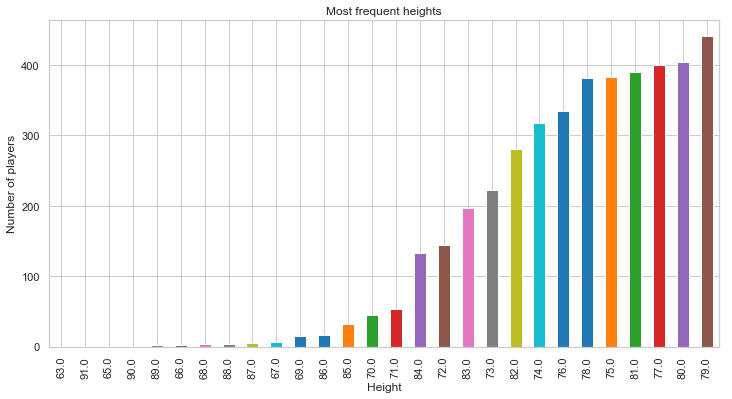

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
x = nba.height
height_count = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(height_count, orient='index')

# sort the values from the top to the least value 
df = df[0].sort_values(ascending = True)
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.title('Most frequent heights')

# show the plot
plt.show()

Just to have an idea of the distribution of player position.

In [17]:
nba['position'].value_counts(normalize=True)

G      0.356278
F      0.285307
C      0.096368
F-C    0.085450
G-F    0.079753
F-G    0.048659
C-F    0.048184
Name: position, dtype: float64

#### Now is part where I get into some regression analysis. In order for me to do any type of analysis i'll need to make sure that there are no missing entries in my dataframe (already taken care of), and that all entries are numeric (i.e. int or float). So I will only be looking at columns with only numeric entries.

In [18]:
nba_col = nba_new[['position', 'height', 'weight', 'Years_Played' , 'starting_age']]
nba_col.head(7)

,position,height,weight,Years_Played,starting_age
0,4,82.0,240.0,5,23.0
1,7,81.0,235.0,10,23.0
2,3,86.0,225.0,20,23.0
3,1,73.0,162.0,11,22.0
4,2,78.0,223.0,6,24.0
5,2,81.0,225.0,12,21.0
6,2,79.0,220.0,5,23.0


#### Before continuing, I want to ensure that there is a linear relationship between the predictors and the target, so i'l check that out by looking scatter plot metrics.

C:\Users\Sammael89\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sammael89\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sammael89\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sammael89\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


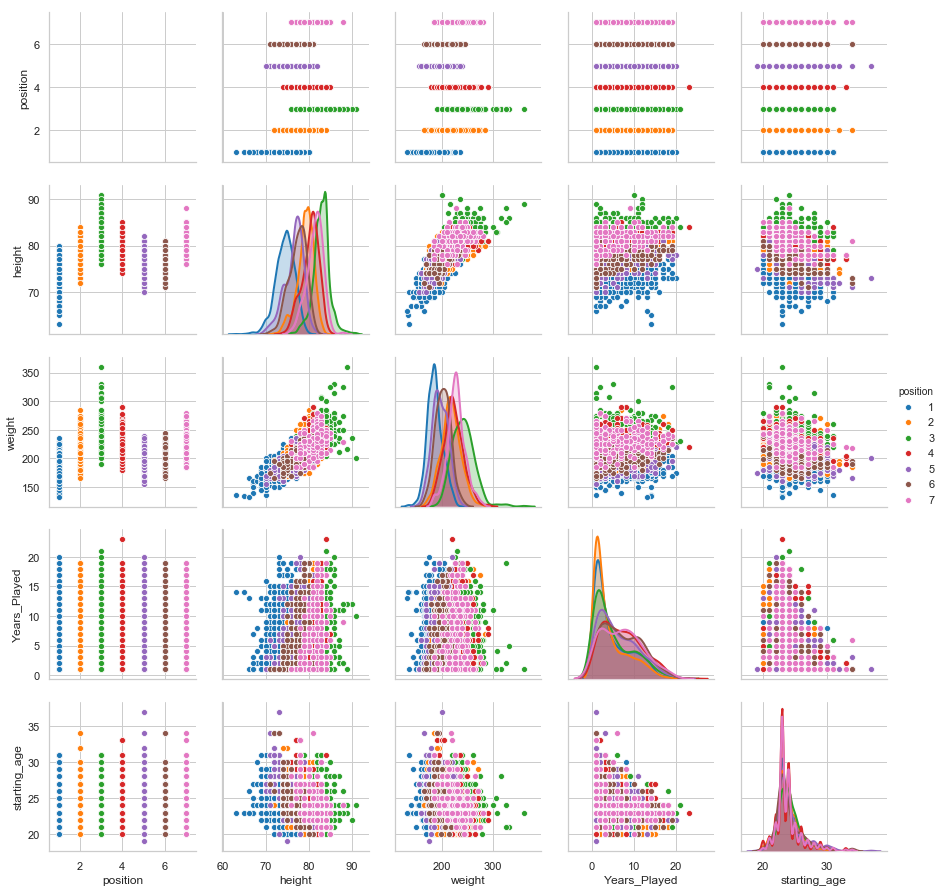

In [19]:
sb.pairplot(nba_col,hue = 'position')

#### Checking the correlation between my predictor variables.

In [20]:
print(nba_col.corr())

              position    height    weight  Years_Played  starting_age
position      1.000000  0.415854  0.326706      0.196497      0.040539
height        0.415854  1.000000  0.822154      0.141010     -0.160400
weight        0.326706  0.822154  1.000000      0.114646     -0.127670
Years_Played  0.196497  0.141010  0.114646      1.000000     -0.283691
starting_age  0.040539 -0.160400 -0.127670     -0.283691      1.000000


## Linear Regression.

In [21]:
nba_col_data = nba_col.iloc[:,1:3].values
X1 = preprocessing.scale(nba_col_data)
nba_col_target =  nba_col.iloc[:,0].values
X,y = scale(nba_col_data), nba_col_target

LinReg = LinearRegression(normalize = True)
LinReg.fit(X1,y)
print(LinReg.score(X1,y))

0.17364618657301986


#### Apparently the linear model was a terrible choice (which is not surprising given that the task is to classify and not do a regression). Let's try a logistic model instead, but before I continue it might be a good idea to check if the target is binary or ordinal.

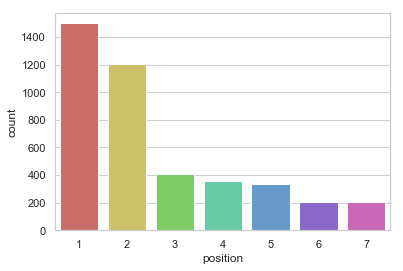

In [22]:
sb.countplot(x='position', data = nba_col, palette = 'hls')

## Logistic Regression.

In [23]:
nba_col_data = nba_col.iloc[:,1:3].values
X2 = preprocessing.scale(nba_col_data)
target = nba_col.iloc[:,0].values
LogReg = LogisticRegression()
LogReg.fit(X2,target)
print('Accuracy: %.2f' % LogReg.score(X2,target))

Accuracy: 0.62


C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### This is a much better result, basically you have 62.5% chance of knowing a players position if you know their height and weight. Let's investigate if this can be improved.

In [24]:
y_Pred = LogReg.predict(X2)
from sklearn.metrics import classification_report
print(classification_report(y,y_Pred))

              precision    recall  f1-score   support

           1       0.71      0.93      0.81      1501
           2       0.52      0.83      0.64      1202
           3       0.74      0.58      0.65       406
           4       0.00      0.00      0.00       360
           5       0.00      0.00      0.00       336
           6       0.00      0.00      0.00       205
           7       0.00      0.00      0.00       203

   micro avg       0.62      0.62      0.62      4213
   macro avg       0.28      0.33      0.30      4213
weighted avg       0.47      0.62      0.53      4213



C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploring the K-NN Model

#### The next task is to attemp the K-nearest neighbors algorithm. The reason for this is beacause much like logistic regression, this is algorithm specializes in classification.

In [25]:
nba_col_data = nba_col.iloc[:,1:3].values
X = preprocessing.scale(nba_col_data)
y = nba_col.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 10)

In [38]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)
y_expect = y_test
y_pred = classifier.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.93      0.81       300
           2       0.57      0.76      0.65       255
           3       0.53      0.66      0.59        70
           4       0.20      0.04      0.07        75
           5       0.00      0.00      0.00        66
           6       0.43      0.08      0.14        36
           7       0.33      0.05      0.09        41

   micro avg       0.63      0.63      0.63       843
   macro avg       0.40      0.36      0.34       843
weighted avg       0.53      0.63      0.55       843



In [39]:
print('Accuracy: %.2f' % accuracy_score(y_expect, y_pred))

Accuracy: 0.63


In [42]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(n_iter=1000, eta0=0.001, random_state=7)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_expect != y_pred).sum())

C:\Users\Sammael89\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Misclassified samples: 350


#### Again, we basically have a 62.5% chance of knowing a players position if you know their height and weight. Two different classification machine learning algorithms gave essentially the same solution, so we can feel assured that this is the correct solution (with 350 misclassified samples). 

### Online visualizations of Player stats
https://public.tableau.com/profile/warren.wilson#!/vizhome/nba_stats_0/nba_stats?publish=yes

In [41]:
#Saving the cleaned dataset as a Excel document
writer = pd.ExcelWriter('NBA_Cleaned2.xlsx')
nba_new.to_excel(writer,'Sheet1')
writer.save()

In [1]:
class MathUtils:

    @staticmethod
    def average(a, b):
        return a + b / 2

print(MathUtils.average(2, 1))

2.5


In [ ]:
++6++